# 데이터 로드

In [13]:
import numpy as np
import pandas as pd 
from random import randint
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline

#모델링
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras import layers
from tensorflow.keras import Model
import cv2
from IPython.display import SVG
from IPython.display import Image
from sklearn.utils import shuffle

In [2]:
os.listdir()

['.ipynb_checkpoints', 'data', 'Intel_image_classification.ipynb']

In [3]:
os.listdir('data/seg_train')

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

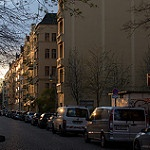

In [4]:
# img = cv2.imread('data/seg_train/street/2.jpg')
# cv2.namedWindow('image')
# cv2.imshow('image', img)
# cv2.waitKey()            # 키보드입력을 누를떄까지 보여줌

# cv2.destroyAllWindows()
Image('data/seg_train/street/2.jpg')

## 데이터 셋 카테고리 분류

In [5]:
def get_images(directory):
    Labels = []
    Images = []
    
    label = 0
    
    for labels in os.listdir(directory):
        if labels == 'buildings':
            label=0
        elif labels == 'forest':
            label=1
        elif labels == 'glacier':
            label=2
        elif labels == 'mountain':
            label=3
        elif labels == 'sea':
            label=4
        elif labels == 'street':
            label=5
            
        for image_file in os.listdir(directory + labels):
            image = cv2.imread(directory + labels+r'/'+image_file)
            image = cv2.resize(image, (150,150))
            Labels.append(label)
            Images.append(image)
           
        
    return shuffle(Images, Labels, random_state=235)   

In [6]:
def get_classlabel(class_code):
    labels = {0: 'buildings', 
              1: 'forest',
              2: 'glacier',
              3: 'mountain',
              4: 'sea',
              5: 'street'}
    return labels[class_code]

## train, test 분리

In [7]:
#학습 데이터 분리 및 array 형태 변환
x_train, y_train = get_images('data/seg_train/')
x_train = np.array(x_train)
y_train = np.array(y_train)
print('Shape of x_train:', x_train.shape)
print('Shape op y_train:', y_train.shape)

Shape of x_train: (14034, 150, 150, 3)
Shape op y_train: (14034,)


In [8]:
#test data 분리 및 array 형태 변환
x_test, y_test = get_images('data/seg_test/')
x_test = np.array(x_test)
y_test = np.array(y_test)
print('Shape of x_test:', x_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of x_test: (3000, 150, 150, 3)
Shape of y_test: (3000,)


2


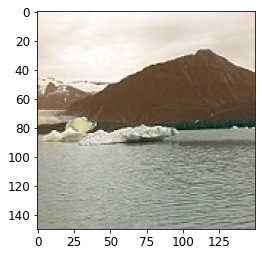

In [9]:
#분류된 이미지 랜덤으로 확인
plt.imshow(x_train[14000])
print(y_train[14000])

In [10]:
randnum = randint(0, len(x_train))

In [11]:
get_classlabel(y_train[randnum])

'glacier'

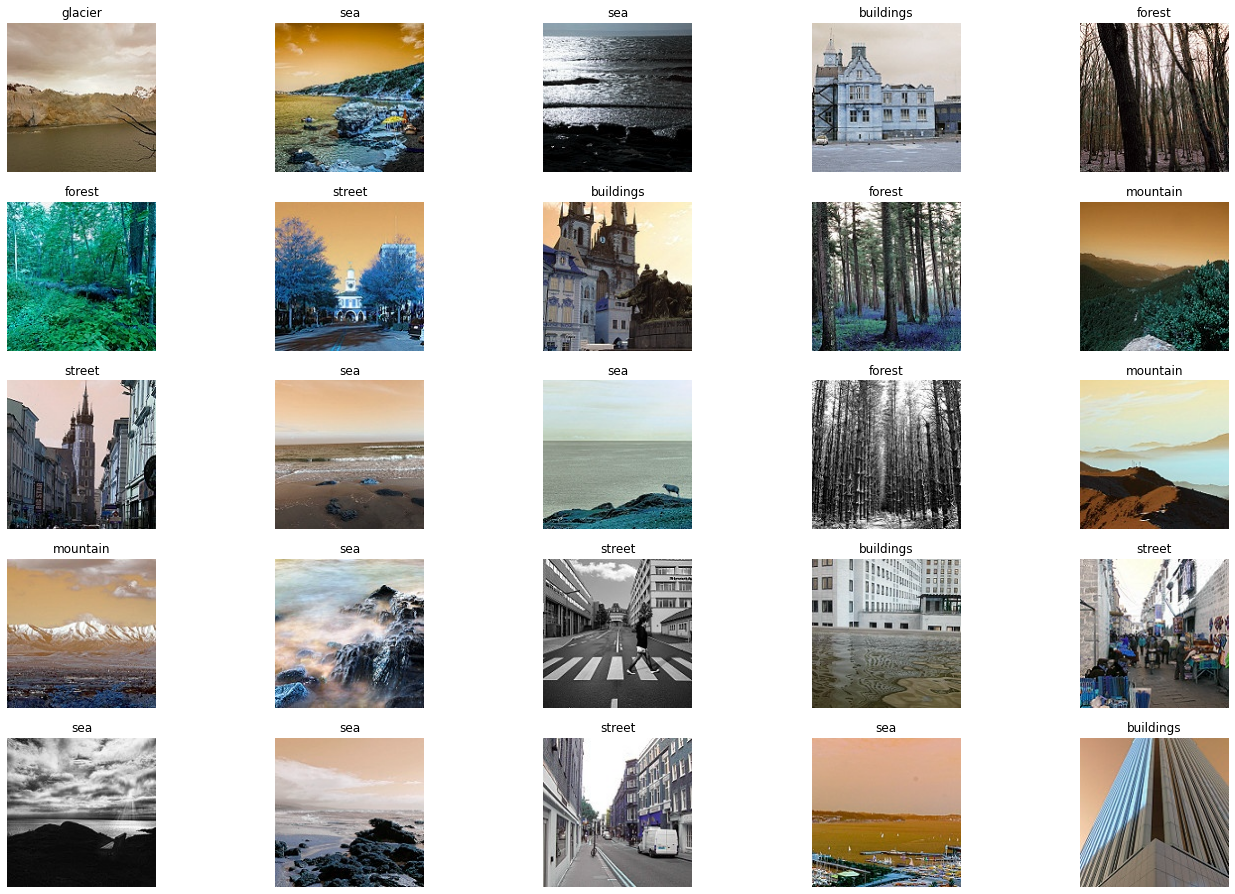

In [12]:
# 분류된 이미지 카테고리 랜덤적으로 확인
fig, ax = plt.subplots(5,5)
fig.subplots_adjust(left=0, bottom=0, right=3, top=3)


for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_num = randint(0, len(x_train))
        ax[i,j].imshow(x_train[rnd_num])
        ax[i,j].set_title(get_classlabel(y_train[rnd_num]))
        ax[i,j].axis('off')

# 분류 모델링

## Baseline

In [16]:
#Baseline 모델 정의
cnn_clf = keras.Sequential([
    layers.Conv2D(128, 7, activation='relu', padding='same', kernel_initializer='glorot_uniform', input_shape=[150,150,3]),
    layers.Conv2D(128, 7, activation='relu', padding='same', kernel_initializer='glorot_uniform'),
    layers.MaxPooling2D(3),
    layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='glorot_uniform'),
    layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='glorot_uniform'),
    layers.MaxPooling2D(3),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='glorot_uniform'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform'),
    layers.Dropout(0.2),
    layers.Dense(6, activation='softmax')
])

cnn_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 128)     18944     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 150, 150, 128)     802944    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 256)       295168    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 256)       590080    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0

In [17]:
#모델 컴파일
cnn_clf.compile(optimizer=Adam(lr=0.0001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

#모델 학습
history = cnn_clf.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
439/439 [==============================] - 435s 992ms/step - loss: 1.8395 - accuracy: 0.3216 - val_loss: 1.4071 - val_accuracy: 0.4037
Epoch 2/10
439/439 [==============================] - 420s 957ms/step - loss: 1.3694 - accuracy: 0.4936 - val_loss: 1.1494 - val_accuracy: 0.5923
Epoch 3/10
439/439 [==============================] - 421s 959ms/step - loss: 1.1025 - accuracy: 0.5736 - val_loss: 0.8432 - val_accuracy: 0.6697
Epoch 4/10
439/439 [==============================] - 420s 958ms/step - loss: 0.8898 - accuracy: 0.6456 - val_loss: 0.7783 - val_accuracy: 0.7310
Epoch 5/10
439/439 [==============================] - 420s 957ms/step - loss: 0.7492 - accuracy: 0.7149 - val_loss: 0.7260 - val_accuracy: 0.7297
Epoch 6/10
439/439 [==============================] - 420s 957ms/step - loss: 0.6135 - accuracy: 0.7754 - val_loss: 0.5254 - val_accuracy: 0.8260
Epoch 7/10
439/439 [==============================] - 421s 958ms/step - loss: 0.5142 - accuracy: 0.8157 - val_loss: 0.4951 -

In [18]:
cnn_clf.save('image_clf_baseline.h5')

In [20]:
raw_test = y_test

In [21]:
test_loss, test_acc=cnn_clf.evaluate(x_test,y_test)
print(test_acc)

94/94 [==============================] - 13s 143ms/step - loss: 0.5394 - accuracy: 0.8340
0.8339999914169312


In [22]:
preds = cnn_clf.predict_classes(x_test)
preds

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1, 4, 0, ..., 4, 0, 2], dtype=int64)

# 오분류 데이터 확인

In [25]:
preds = np.argmax(cnn_clf.predict(x_test), axis=-1)

In [26]:
len(preds[preds != raw_test])

498

In [27]:
[i for i,x in enumerate(preds != raw_test) if x]

[4,
 5,
 9,
 12,
 13,
 22,
 28,
 30,
 33,
 38,
 47,
 51,
 57,
 60,
 72,
 75,
 80,
 83,
 84,
 93,
 103,
 105,
 112,
 118,
 119,
 127,
 131,
 137,
 140,
 146,
 147,
 150,
 157,
 159,
 162,
 167,
 171,
 181,
 188,
 195,
 200,
 201,
 205,
 212,
 213,
 216,
 224,
 240,
 244,
 249,
 259,
 260,
 270,
 273,
 275,
 277,
 279,
 286,
 292,
 297,
 306,
 319,
 323,
 333,
 342,
 344,
 345,
 352,
 357,
 360,
 361,
 372,
 373,
 378,
 380,
 383,
 384,
 394,
 395,
 399,
 403,
 404,
 412,
 415,
 419,
 421,
 423,
 424,
 426,
 433,
 435,
 443,
 445,
 447,
 451,
 459,
 460,
 461,
 465,
 466,
 470,
 471,
 475,
 480,
 484,
 487,
 502,
 505,
 506,
 511,
 515,
 517,
 522,
 526,
 529,
 535,
 541,
 543,
 555,
 565,
 567,
 572,
 581,
 582,
 588,
 594,
 595,
 601,
 602,
 604,
 606,
 610,
 617,
 623,
 626,
 630,
 636,
 640,
 646,
 648,
 649,
 653,
 655,
 669,
 672,
 677,
 682,
 697,
 698,
 718,
 729,
 730,
 733,
 745,
 747,
 751,
 759,
 765,
 779,
 782,
 798,
 804,
 806,
 810,
 814,
 818,
 823,
 825,
 838,
 843,
 85

정답: 2
분류: 4


(-0.5, 149.5, 149.5, -0.5)

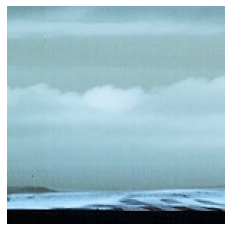

In [29]:
i = 150
print('정답:' , raw_test[i])
print('분류:', preds[i])
plt.imshow(x_test[i])
plt.axis('off')